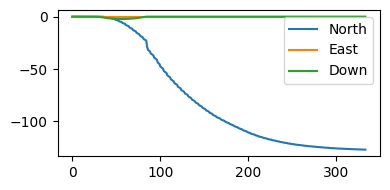

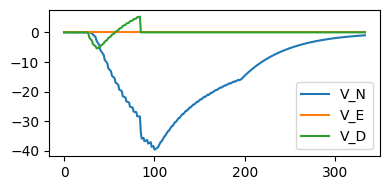

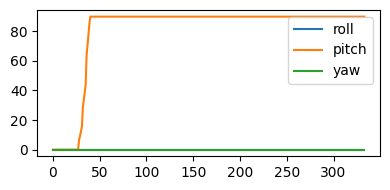

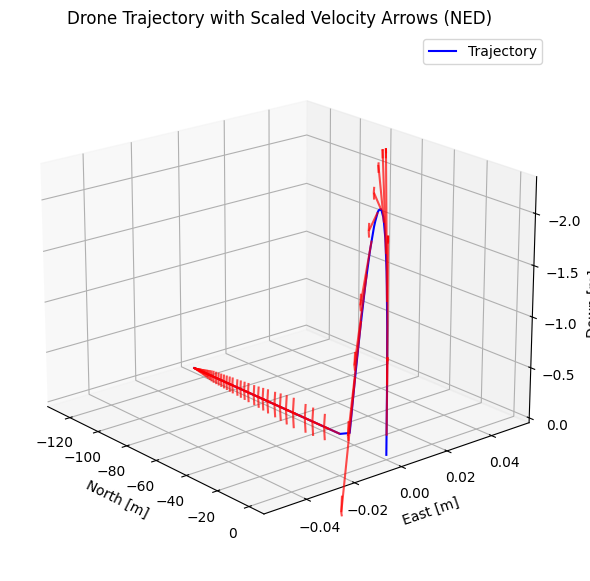

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = pd.read_csv('./log_2026_01_04_48_00.csv')

drone_indexs = [0, 1]
positions = []
velocities = []
rotations = []
for drone_index in drone_indexs:
    for index in range(3):
        positions.append(data[f'drone_{drone_index}_position_{index}'])
        velocities.append(data[f'drone_{drone_index}_velocity_{index}'])
        rotations.append(data[f'drone_{drone_index}_rotation_{index}'])

def plot_status(data, labels):
    plt.figure(figsize=(4,2))
    plt.plot(data[0], label=labels[0])
    plt.plot(data[1], label=labels[1])
    plt.plot(data[2], label=labels[2])
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_status(positions, ['North', 'East', 'Down'])
plot_status(velocities, ['V_N', 'V_E', 'V_D'])
plot_status(rotations, ['roll', 'pitch', 'yaw'])

# NED 좌표계에 맞게 설정 (z = Down, 반전은 시각화용으로만)
x, y, z = positions[0], positions[1], positions[2]
vx, vy, vz = velocities[0], velocities[1], velocities[2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'b-', linewidth=1.5, label='Trajectory')

# 화살표 설정 - 머리 크기 조절
arrow_interval = 5      # 몇 스텝마다 화살표를 그릴지 (숫자 클수록 적게)
arrow_scale = 0.3       # 전체 길이 배율 (0.2~0.5 조정)
arrow_head_ratio = 0.05 # ← 핵심: 머리 크기 비율 (0.1~0.2로 작게, 클수록 머리 커짐)

for i in range(0, len(x), arrow_interval):
    ax.quiver(
        x[i], y[i], z[i], 
        vx[i] * arrow_scale, 
        vy[i] * arrow_scale, 
        vz[i] * arrow_scale, 
        color='red', 
        alpha=0.7, 
        linewidth=1.5,
        arrow_length_ratio=arrow_head_ratio,  # 머리 크기 줄임
        normalize=False
    )

ax.set_xlabel('North [m]')
ax.set_ylabel('East [m]')
ax.set_zlabel('Down [m]')
ax.invert_zaxis()  # Down이 아래로 보이게
ax.view_init(elev=20, azim=-40)
ax.legend()
ax.grid(True, alpha=0.3)
plt.title('Drone Trajectory with Scaled Velocity Arrows (NED)')
plt.show()